<a href="https://colab.research.google.com/github/RaziehAkbari2020/CNN-C2-2/blob/main/CNN_C2_3_tf_data_%26_split_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle

In [3]:
!mv kaggle.json ~/.kaggle

In [4]:
! kaggle competitions download -c dogs-vs-cats

 97% 791M/812M [00:03<00:00, 287MB/s]
100% 812M/812M [00:03<00:00, 250MB/s]


In [5]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [6]:
!unzip -q train.zip

In [7]:
!ls train | wc -l

25000


In [8]:
import os
len(os.listdir('train'))

25000

In [9]:
!rm -r dogs-vs-cats.zip sampleSubmission.csv test1.zip train.zip sample_data/

In [10]:
from tensorflow import keras

In [11]:
import os, shutil

In [12]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/content/train'

# The directory where we will
# store our smaller dataset
base_dir = '/content/subset'
os.makedirs(base_dir, exist_ok=True)

In [13]:
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [15]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [17]:
from keras import optimizers
#### چون سیگوید هست binary زدیم
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [18]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
### یک مینی بچ رانشان می دهد
data, lbl=next(iter(train_generator))
data.shape, lbl

((20, 150, 150, 3),
 array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
        0., 0., 0.], dtype=float32))

In [20]:
history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
100/100 [==============================] - 11s 62ms/step - loss: 0.6942 - acc: 0.5245 - val_loss: 0.6935 - val_acc: 0.5080
Epoch 2/30
100/100 [==============================] - 5s 48ms/step - loss: 0.6774 - acc: 0.5940 - val_loss: 0.7002 - val_acc: 0.5400
Epoch 3/30
100/100 [==============================] - 5s 54ms/step - loss: 0.6238 - acc: 0.6510 - val_loss: 0.5718 - val_acc: 0.6850
Epoch 4/30
100/100 [==============================] - 5s 54ms/step - loss: 0.5804 - acc: 0.6950 - val_loss: 0.5477 - val_acc: 0.7180
Epoch 5/30
100/100 [==============================] - 5s 49ms/step - loss: 0.5402 - acc: 0.7210 - val_loss: 0.5609 - val_acc: 0.7080
Epoch 6/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5098 - acc: 0.7450 - val_loss: 0.5770 - val_acc: 0.7050
Epoch 7/30
100/100 [==============================] - 5s 52ms/step - loss: 0.4604 - acc: 0.7760 - val_loss: 0.5489 - val_acc: 0.7440
Epoch 8/30
100/100 [==============================] - 6s 62ms/step -

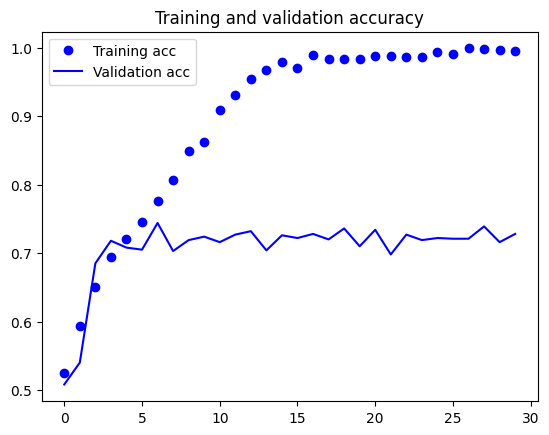

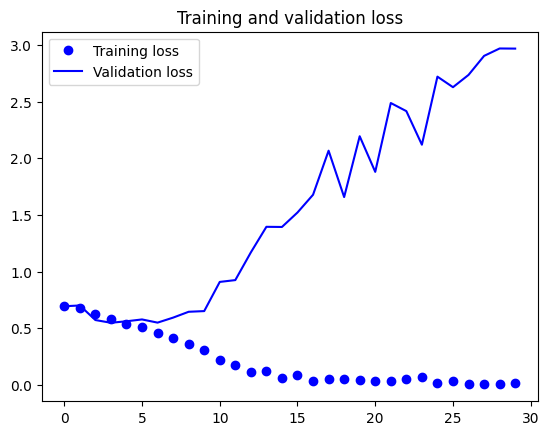

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**The second Syntax with tf.data**

In [57]:
import tensorflow as tf

list_ds_train = tf.data.Dataset.list_files(str(train_dir + '/*/*.jpg'))
list_ds_validation = tf.data.Dataset.list_files(str(validation_dir + '/*/*.jpg'))

def parse_image(filename):
    parts = tf.strings.split(filename, '/')
    label = parts[-2]

    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [150, 150])
    lbl = tf.cast(label == 'dogs', tf.float32)
    return image, lbl

    ###میتونستی تقسیم 255 هم انجام بدی

In [58]:
AUTOTUNE=tf.data.AUTOTUNE ### تکنیکی که میگه اگر خواستی میتونی بری بیش از 20 تا داده برداری بیاری و فاین تیون کردنش دیگه با خودشه
data_train = list_ds_train.map(parse_image).batch(20).prefetch(buffer_size=AUTOTUNE)
data_validation = list_ds_validation.map(parse_image).batch(20).prefetch(buffer_size=AUTOTUNE)


In [50]:
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['acc'])

In [59]:
h=model.fit(data_train, epochs=30, validation_data=data_validation)

Epoch 1/30
100/100 [==============================] - 4s 36ms/step - loss: 0.0206 - acc: 0.9970 - val_loss: 3.7172 - val_acc: 0.7230
Epoch 2/30
100/100 [==============================] - 3s 34ms/step - loss: 0.0080 - acc: 0.9990 - val_loss: 4.1335 - val_acc: 0.7100
Epoch 3/30
100/100 [==============================] - 5s 50ms/step - loss: 0.0485 - acc: 0.9915 - val_loss: 3.6074 - val_acc: 0.7290
Epoch 4/30
100/100 [==============================] - 4s 36ms/step - loss: 0.0219 - acc: 0.9955 - val_loss: 3.9735 - val_acc: 0.7150
Epoch 5/30
100/100 [==============================] - 6s 64ms/step - loss: 0.0321 - acc: 0.9925 - val_loss: 4.7906 - val_acc: 0.7100
Epoch 6/30
100/100 [==============================] - 7s 70ms/step - loss: 0.0100 - acc: 0.9980 - val_loss: 4.7620 - val_acc: 0.7220
Epoch 7/30
100/100 [==============================] - 6s 63ms/step - loss: 0.0091 - acc: 0.9990 - val_loss: 4.5066 - val_acc: 0.7260
Epoch 8/30
100/100 [==============================] - 6s 59ms/step - 

Remove Overfitting